## Victor Gómez
### victor.gomez@cimat.mx


# Maestría en Cómputo Estadístico
# CIMAT Monterrey

# <center>Tópicos selectos de análisis de datos<center>
# <center>Tarea 1<center>
## <center>Para entregar el 9 de septiembre de 2020<center>

Instrucciones: 
- Entrega un solo jupyter notebook por tarea. Incluye cualquier archivo, imágen, datos, etcétera, para que pueda ejecutarse. Si lo crees conveniente, puedes usar latex para los ejercicios que lo requieran.

- Usa python 3.x y tensorflow 2.x

- Todos tus archivos DEBES nombrarlos con el siguiente formato: TareaXXX_Nombre_Apellido.ipynb, TareaXXX_Nombre_Apellido.pdf, TareaXXX_Nombre_Apellido.csv, etcétera.

- Crea una carpeta con nombre TareaXXX_Nombre_Apellido donde incluirás todos tus archivos, y entrega UN SOLO archivo ZIP usando el mismo formato para el nombre: TareaXXX_Nombre_Apellido.zip

- LAS TAREAS SON INDIVIDUALES, a menos que se especifique lo contrario


1. Calcula lo siguiente:
$$ 
\begin{pmatrix} 1 & 2 \\ 
3 & 4 \end{pmatrix} 
\begin{pmatrix} 0 & 1 \\ 
2 & 3 \end{pmatrix} 
+ 
\begin{pmatrix} 7 & 9 \end{pmatrix} 
$$

Usa broadcasting de tal forma que la operación esté bien definida. Antes, averigua qué es broadcasting, en el contextos de numpy-tensorflow...

### <font color=green>Tu respuesta aquí</font>


In [1]:
#numpy
import numpy as np

a=np.array([[1,2],[3,4]])
b=np.array([[0,1],[2,3]])
c=np.array([7,9])

print(a@b+c)

[[11 16]
 [15 24]]


In [2]:
#tensorflow
import tensorflow as tf

a1=tf.constant([1,2,3,4],shape=[2,2])
b1=tf.constant([0,1,2,3],shape=[2,2])
c1=tf.constant([7,9],shape=[1,2])

print(np.array(tf.matmul(a1,b1)+c1))

[[11 16]
 [15 24]]


2. Las funciones  `tf.math.reduce_` de `tensorflow` reducen las dimensiones de un tensor realizando operaciones en sus elementos. Por ejemplo,
```python
x = tf.constant([[1, 1, 1], [1, 1, 1]])
tf.reduce_sum(x)
# obtenemos 6
tf.reduce_sum(x, 0)
## dará como resultado
[2, 2, 2]
```
Ahora, considera el siguiente código:
```python
a = tf.constant([[1.], [2.]])
b = tf.constant([1., 2.])
c = tf.reduce_sum(a + b)
```
¿Qué valor tendrá `c` ? Explica porqué da ése resultado.

### <font color=green>Tu respuesta aquí</font>

a es un vector columna (2,1), b es un vector fila (1,2). La operación a+b usa broadcasting por lo cual da como resultado una matriz (2,2) y al aplicar la función tf.reduce_sum() devuelve un escalar que representa la suma de cada una de los elementos de la matriz

In [3]:
a = tf.constant([[1.], [2.]])
b = tf.constant([1., 2.])
c = tf.reduce_sum(a + b)
print(np.array(c))

12.0


3. Considera un problema de clasificación multiclase y una red neuronal densa con una capa oculta, como se muestra en la figura 1.
<img src="fig.png" height="40%" width="40%"/>
<center> Figura 1 <center>

    
Consideraremos también el uso de la función sigmoide como activación de las unidades ocultas, la función softmax para las estimaciones en la capa de salida y cross-entropy como función de costo.

(a) Muestra que softmax es invariante a traslaciones (constantes) del vector de entrada, es decir, para cualquier vector $\mathbf{x}$ y cualquier constante $c$: 
$$
\text{softmax}(\mathbf{x}) = \text{softmax}(\mathbf{x}+c),
$$
    donde la operación $\mathbf{x}+c$ se realiza con broadcasting. Recuerda que 
$$
\text{softmax}(\mathbf{x})_i = \frac{e^{\mathbf{x}_i}}{\sum_j e^{\mathbf{x}_j}}.
$$

Lo anterior es útil cuando se escoge $c=-\max(\mathbf{x})$, es decir, quitando el valor mayor en todos los elementos de $\mathbf{x}$, para estabilidad numérica.

### <font color=green>Tu respuesta aquí</font>


Desarrollando el lado derecho: $soft\max \left( {{x_i} + c} \right) = \frac{{{e^{\left( {{x_i} + c} \right)}}}}{{\sum\limits_j {\left( {{e^{{x_j} + c}}} \right)} }}$
$\frac{{{e^{\left( {{x_i} + c} \right)}}}}{{\sum\limits_j {\left( {{e^{{x_j} + c}}} \right)} }} = \frac{{{e^{{x_i}}}{e^c}}}{{\sum\limits_j {\left( {{e^{{x_j}}}{e^c}} \right)} }}$, como ${e^c}$ es una constante, $\frac{{{e^c}{e^{{x_i}}}}}{{{e^c}\sum\limits_j {\left( {{e^{{x_j}}}} \right)} }} = \frac{{{e^{{x_i}}}}}{{\sum\limits_j {\left( {{e^{{x_j}}}} \right)} }} = soft\max \left( {{x_i}} \right)$


(b) Para un escalar $x$, muestra que el gradiente de la función sigmoide es $\sigma(x)(1-\sigma(x))$

### <font color=green>Tu respuesta aquí</font>


La función sigmoide es $\sigma \left( x \right) = \frac{1}{{1 + {e^{ - x}}}} = {\left( {1 + {e^{ - x}}} \right)^{ - 1}}$, derivando respecto a $x$:
$\sigma '\left( x \right) =  - 1{\left( {1 + {e^{ - x}}} \right)^{ - 2}}\left( {{e^{ - x}}} \right)\left( { - 1} \right) = {\left( {1 + {e^{ - x}}} \right)^{ - 1}}{\left( {1 + {e^{ - x}}} \right)^{ - 1}}\left( {{e^{ - x}}} \right)$, acomodando términos: 
$\sigma '\left( x \right) = \sigma \left( x \right)\left( {\frac{{{e^{ - x}}}}{{1 + {e^{ - x}}}}} \right)$, sumando y restando 1 y acomodando términos: $\sigma '\left( x \right) = \sigma \left( x \right)\left( {\frac{{{e^{ - x}} + 1 - 1}}{{1 + {e^{ - x}}}}} \right) = \sigma \left( x \right)\left( {\frac{{\left( {1 + {e^{ - x}}} \right) - 1}}{{1 + {e^{ - x}}}}} \right) = \sigma \left( x \right)\left( {1 - \frac{1}{{1 + {e^{ - x}}}}} \right) = \sigma \left( x \right)\left( {1 - \sigma \left( x \right)} \right)$


(c) Muestra que el gradiente en la capa de salida es 
$$
    \frac{\partial L(\mathbf{y},{\hat{\mathbf{y}}})}{\partial \mathbf{z}}=\hat{\mathbf{y}}-\mathbf{y},
$$
    donde $\hat{\mathbf{y}}=\text{softmax}(\mathbf{z})$, para algún vector $\mathbf{z}$ que proviene de la capa de salida. 
    
La función de costo, como mencionamos al inicio, es la cross-entropy: $L(\mathbf{y},{\hat{\mathbf{y}}}) = \displaystyle -\sum_i y_i\log(\hat{y}_i)$, donde $\mathbf{y}$ es un vector *one-hot* de las clases y $\hat{\mathbf{y}}$ es el vector de probabilidades estimadas.

### <font color=green>Tu respuesta aquí</font>


En la segunda capa (de salida) ${a_2} = \hat y$, tenemos la función $\hat y = soft\max \left( {{z_2}} \right)$,  donde ${z_2} = {W_2}{a_1} + {b_2}$  (${a_1} = h$) por el momento ${z_2} = z$. Entonces si vamos hacia atrás desde la función de costo $L\left( {y,\hat y} \right)$ haciendo backpropagation obtenemos las derivadas: primero $d\hat y = \frac{{\partial L}}{{\partial \hat y}}$, y después haciendo uso de la regla de la cadena $dz = \frac{{\partial L}}{{\partial z}} = \frac{{\partial L}}{{\partial \hat y}}\frac{{\partial \hat y}}{{\partial z}}$.


$\frac{{\partial L}}{{\partial \hat y}} =  - \sum {\frac{{{y_k}}}{{{{\hat y}_k}}}} $, donde $k = \left[ {1,0} \right]$, es decir si pertenece o no a la clase de interés. Entonces lo podríamos ver de esta otra forma: $\frac{{\partial L}}{{\partial \hat y}} =  - \frac{{{y_i}}}{{{{\hat y}_i}}} - \sum\limits_{k \ne 1} {\frac{{{y_k}}}{{{{\hat y}_k}}}} $


Para derivada de la función softmax ${\hat y_i} = soft\max \left( {{z_i}} \right) = \frac{{{e^{{z_i}}}}}{{\sum\nolimits_j {{e^{{z_j}}}} }} = \frac{{g\left( {{z_i}} \right)}}{{h\left( {{z_j}} \right)}}$,  $\frac{{\partial \hat y}}{{\partial {z_i}}} = \hat y' = \frac{{g'h - h'g}}{{{h^2}}}$

Entonces hay dos casos $i = j$ o  $i \ne j$.

 Para el primer caso $i = j$: 
$g' = \frac{{\partial g}}{{\partial {z_i}}} = {e^{{z_i}}}$, $h' = \frac{{\partial h}}{{\partial {z_j}}} = \frac{{\partial \left( {{e^{{z_0}}} + {e^{{z_i}}} + ... + {e^{{z_j}}}} \right)}}{{\partial {z_j}}} = {e^{{z_j}}}$, $\hat y' = \frac{{{e^{{z_i}}}\left( {\sum\nolimits_j {{e^{{z_j}}}} } \right) - {e^{{z_j}}}{e^{{z_i}}}}}{{{{\left( {\sum\nolimits_j {{e^{{z_j}}}} } \right)}^2}}} = \left( {\frac{{{e^{{z_i}}}}}{{\sum\nolimits_j {{e^{{z_j}}}} }}} \right)\left( {\frac{{\sum\nolimits_j {{e^{{z_j}}}}  - {e^{{z_j}}}}}{{\sum\nolimits_j {{e^{{z_j}}}} }}} \right) = {\hat y_i}\left( {1 - {{\hat y}_j}} \right) = {\hat y_i}\left( {1 - {{\hat y}_i}} \right)$


Para el segundo caso $i \ne j$: 
$g' = \frac{{\partial g}}{{\partial {z_i}}} = 0$, $h' = \frac{{\partial h}}{{\partial {z_j}}} = \frac{{\partial \left( {{e^{{z_0}}} + {e^{{z_i}}} + ... + {e^{{z_j}}}} \right)}}{{\partial {z_j}}} = {e^{{z_j}}}$, $\hat y' = \frac{{0\left( {\sum\nolimits_j {{e^{{z_j}}}} } \right) - {e^{{z_j}}}{e^{{z_i}}}}}{{{{\left( {\sum\nolimits_j {{e^{{z_j}}}} } \right)}^2}}} =  - \left( {\frac{{{e^{{z_i}}}}}{{\sum\nolimits_j {{e^{{z_j}}}} }}} \right)\left( {\frac{{{e^{{z_j}}}}}{{\sum\nolimits_j {{e^{{z_j}}}} }}} \right) =  - {\hat y_i}{\hat y_j}$


Entonces juntando lo anterior: $dz = \frac{{\partial L}}{{\partial z}} = \frac{{\partial L}}{{\partial \hat y}}\frac{{\partial \hat y}}{{\partial z}} =  - \frac{{{y_i}}}{{{{\hat y}_i}}}\frac{{\partial \hat y}}{{\partial {z_{i = j}}}} - \sum\limits_{k \ne 1} {\frac{{{y_k}}}{{{{\hat y}_k}}}} \frac{{\partial \hat y}}{{\partial {z_{i \ne j}}}}$,
$dz =  - \frac{{{y_i}}}{{{{\hat y}_i}}}\left( {{{\hat y}_i}\left( {1 - {{\hat y}_i}} \right)} \right) - \sum\limits_{k \ne 1} {\frac{{{y_k}}}{{{{\hat y}_k}}}} \left( { - {{\hat y}_i}{{\hat y}_k}} \right) =  - {y_i}\left( {1 - {{\hat y}_i}} \right) + \sum\limits_{k \ne 1} {{y_k}\left( {{{\hat y}_i}} \right)} $,
$dz =  - {y_i} + {y_i}{\hat y_i} + \sum\limits_{k \ne 1} {{y_k}\left( {{{\hat y}_i}} \right)}  = {\hat y_i}\left( {{y_i} + \sum\limits_{k \ne 1} {{y_k}\left( {{{\hat y}_i}} \right)} } \right) - {y_i}$, donde $\left( {{y_i} + \sum\limits_{k \ne 1} {{y_k}\left( {{{\hat y}_i}} \right)} } \right) = 1$ ya que $y$ es un vector one-hot, es decir con un 1 y ceros, por lo tanto $dz = \frac{{\partial L}}{{\partial z}} = {\hat y_i} - {y_i}$






(d) Considerando los incisos anteriores, obtén las ecuaciones de backpropagation para la red neuronal, es decir, calcula
$$
    \frac{\partial L(\mathbf{y},{\hat{\mathbf{y}}})}{\partial \mathbf{x}}.
$$
Recuerda que el paso forward calcula las activaciones: $\mathbf{h} = \sigma(\mathbf{x}\mathbf{W}_1+\mathbf{b}_1)
$ y $\hat{\mathbf{y}} = \text{softmax}(\mathbf{h}\mathbf{W}_2+\mathbf{b}_2)$.

Recuerda también que la función de activación en un vector (tensor), se aplica entrada por entrada.

### <font color=green>Tu respuesta aquí</font>


Para obtener $\frac{{\partial L}}{{\partial X}} = \left( {\frac{{\partial L}}{{\partial \hat y}}\frac{{\partial \hat y}}{{\partial {z_2}}}} \right)\left( {\frac{{\partial {z_2}}}{{\partial h}}\frac{{\partial h}}{{\partial {z_1}}}} \right)\frac{{\partial {z_1}}}{{\partial X}} = \left( {d{z_2}} \right)\left( {\frac{{\partial {z_2}}}{{\partial h}}\frac{{\partial h}}{{\partial {z_1}}}} \right)\frac{{\partial {z_1}}}{{\partial X}}$, donde $\hat y = soft\max \left( {{z_2}} \right)$, ${z_2} = {W_2}h + {b_2}$,$h = \sigma \left( {{z_1}} \right)$, ${z_1} = {W_1}X + {b_1}$.

Sus respectivas derivadas son: $\left( {d{z_2}} \right) = {\hat y_{}} - {y_{}}$,$\frac{{\partial {z_2}}}{{\partial h}} = {W_2}$,$\frac{{\partial h}}{{\partial {z_1}}} = \sigma \left( {{z_1}} \right)\left( {1 - \sigma \left( {{z_1}} \right)} \right)$ ,$\frac{{\partial {z_1}}}{{\partial X}} = {W_1}$ 

Sustituyendo: $\frac{{\partial L}}{{\partial X}} = W_2^td{z_2}\left( {\sigma \left( {{z_1}} \right)\left( {1 - \sigma \left( {{z_1}} \right)} \right)} \right)W_1^t$


Para backpropagation necesitamos calcular $\frac{{\partial L}}{{\partial {W_2}}} = \left( {\frac{{\partial L}}{{\partial \hat y}}\frac{{\partial \hat y}}{{\partial {z_2}}}} \right)\left( {\frac{{\partial {z_2}}}{{\partial {W_2}}}} \right)$, $\frac{{\partial L}}{{\partial {b_2}}} = \left( {\frac{{\partial L}}{{\partial \hat y}}\frac{{\partial \hat y}}{{\partial {z_2}}}} \right)\left( {\frac{{\partial {z_2}}}{{\partial {b_2}}}} \right)$ , $\frac{{\partial L}}{{\partial {W_1}}} = \left( {\frac{{\partial L}}{{\partial \hat y}}\frac{{\partial \hat y}}{{\partial {z_2}}}} \right)\left( {\frac{{\partial {z_2}}}{{\partial h}}\frac{{\partial h}}{{\partial {z_1}}}} \right)\frac{{\partial {z_1}}}{{\partial {W_1}}}$, $\frac{{\partial L}}{{\partial {b_1}}} = \left( {\frac{{\partial L}}{{\partial \hat y}}\frac{{\partial \hat y}}{{\partial {z_2}}}} \right)\left( {\frac{{\partial {z_2}}}{{\partial h}}\frac{{\partial h}}{{\partial {z_1}}}} \right)\frac{{\partial {z_1}}}{{\partial {b_1}}}$, 

por lo que seguimos un procedimiento similar al anterior y obtenemos:
$d{W_2} = \frac{{\partial L}}{{\partial {W_2}}} = d{z_2}{h^t}$,$d{b_2} = \frac{{\partial L}}{{\partial {b_2}}} = d{z_2}$,
 $d{z_1} = \frac{{\partial L}}{{\partial {z_1}}} = \left( {\frac{{\partial L}}{{\partial \hat y}}\frac{{\partial \hat y}}{{\partial {z_2}}}} \right)\left( {\frac{{\partial {z_2}}}{{\partial h}}\frac{{\partial h}}{{\partial {z_1}}}} \right) = W_2^td{z_2}\left( {\sigma \left( {{z_1}} \right)\left( {1 - \sigma \left( {{z_1}} \right)} \right)} \right)$, 
$d{W_1} = \frac{{\partial L}}{{\partial {W_1}}} = d{z_1}{X^t}$, $d{b_1} = \frac{{\partial L}}{{\partial {b_1}}} = d{z_1}$



(e) Implementa una clase `NN1HD` que entrene una red neuronal con una capa oculta como la que se muestra en la figura 1, usando los resultados de los incisos anteriores. Tu clase debe tener al menos, los métodos `train`, `predict`, que realicen las operaciones `feed_forward`, `back_propagation`, `update_weights`, etcétera, y todas las funciones que consideres necesarias (inicializar pesos, imprimir la exactitud o error, etcétera). Utiliza `numpy` para las operaciones numéricas. NO usar `sklearn`, `tensorflow` ni `keras`.

Prueba tu implementación con un conjunto de datos de 2 y 3 categorías (al menos).
Comenta tus hallazgos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Tu codigo aqui...
class NN1HD():    
    def __init__(self, neurons_Hidden_layer=5):
        self.n1=neurons_Hidden_layer #hidden layer
        
    
    #funciones necesarias:    
    #obtiene variables dummies
    def dummies(self,y_labels):
        y_labels_DF = pd.DataFrame(y_labels)
        y_labels_DF.columns = ['labels']
        y_labels_DF.labels=y_labels_DF.labels.astype('category')
        y_one_hot_DF=pd.get_dummies(y_labels_DF,drop_first=False) 
        y_one_hot=y_one_hot_DF.values
        n2=y_one_hot.shape[1] #neurons output layer
        self.n2=n2
        
        return y_one_hot.T
    
    # #regresa la posicion con la maxima probabilidad del renglon i
    def maxin(self,xx):
        maxi=xx==max(xx)
        maxs=np.sum(maxi)
        if maxs==1: a=xx.argmax()
        else: a=np.random.choice(np.where(xx==max(xx))[0]) #si hay probabilidades iguales
        return(int(a))

    #cost function:
    def cross_entropy(self,y_hat,y): 
        m = self.m
        ylog = -1*y*np.log(y_hat)
        loss = np.sum(ylog) / m
        return loss
    
    #activation functions:
    #stable_softmax
    def softmax(self,z): 
        exps = np.exp(z - np.max(z))
        return exps / np.sum(exps,axis=0)
    
    #sigmoid function
    def sigma(self,z): 
        return  1 / (1 + np.exp(-1*z))
    
    def d_sigma(self,z): 
        return self.sigma(z)*(1-self.sigma(z))
    

    
    
    # initialises W and b's
    def initialize_W_b (self, random=np.random) :
        
        
        W1 = random.randn(self.n1, self.n0) *0.01
        W2 = random.randn(self.n2, self.n1) *0.01
        
        b1 = np.zeros((self.n1, 1))
        b2 = np.zeros((self.n2, 1))
        
        self.W1=W1
        self.W2=W2
        
        self.b1=b1
        self.b2=b2
        
        return self
        
        
    
    def feed_forward(self): #a0=X, a1=h, a2=y_hat
        
        W1=self.W1
        W2=self.W2
        
        b1=self.b1
        b2=self.b2
        
        a0=self.a0
        
        z1 = W1 @ a0 + b1
        a1 = self.sigma(z1)
        z2 = W2 @ a1 + b2
        a2 = self.softmax(z2)
        
        self.z1=z1
        self.a1=a1
        self.a2=a2
        return self
        
    def back_propagation(self): #a0=X, a1=h, a2=y_hat
        m = self.m
        
        d_z2=self.a2-self.y
        self.d_W2= (d_z2 @ self.a1.T)/m
        self.d_b2=np.sum(d_z2, axis=1, keepdims=True) /m
        
        d_z1= (self.W2.T@d_z2)*self.d_sigma(self.z1)
        self.d_W1= (d_z1 @ self.a0.T)/m
        self.d_b1=np.sum(d_z1, axis=1, keepdims=True) /m
        
        return self 
        
    def uptade_weights(self):
        self.W1=self.W1-self.learn_rate*self.d_W1
        self.b1=self.b1-self.learn_rate*self.d_b1
        
        self.W2=self.W2-self.learn_rate*self.d_W2
        self.b2=self.b2-self.learn_rate*self.d_b2
        
        return self

    def train(self,X,y, learn_rate=0.3, MaxIter=1000): #gradient descent
        self.learn_rate=learn_rate
        self.a0=X.T #inputs
        self.m=X.shape[0] #examples
        self.n0=X.shape[1] #neurons input layer
        self.y=self.dummies(y)
        self.initialize_W_b () #inicializamos
        
        loss_l=[]
        iter_l=[]
        
        
        j=0
        while (j<=MaxIter):
            iter_l.append(j)
            self.feed_forward() #predictions
            
            
            loss=self.cross_entropy(self.a2,self.y) #loss
            loss_l.append(loss)
            
            self.back_propagation() #derivatives
            self.uptade_weights()  #uptade W and b
            
            j+=1
            
        
        self.loss_train=np.array(loss_l)
        self.iter_=np.array(iter_l)
        
        return self
        
        
        
        
        
    def predict(self,X): 
        
        m = X.shape[0] #examples
        self.a0=X.T
        self.feed_forward()
        y_hat=self.a2.T #probabilidades
        y_pred=np.zeros((m,))
        
        for i in range(m):
            y_pred[i]=self.maxin(y_hat[i,:]) #asigna la clase con la probabilidad mas alta
        
        return y_pred
    
    def plot_loss(self): #plot train loss
        
        i=self.iter_
        loss=self.loss_train
        
        plt.plot(i,loss,label='Train_set_loss')
        plt.xlabel('iter')
        plt.ylabel('loss')
        plt.legend(loc='best')
        plt.show()
        

### Datos sinteticos de prueba

In [60]:
#%% DATOS sinteticos
from sklearn.datasets import make_blobs
import seaborn as sns

X1, y1 = make_blobs(
   n_samples=1000, n_features=2, centers=3, cluster_std=0.75, shuffle=True, random_state=7
)

data_toy1 = pd.DataFrame(X1)
data_toy1.columns = ['x1','x2']
data_toy1 = pd.DataFrame(data_toy1).assign(cl = y1)
data_toy1.cl=data_toy1.cl.astype('category')

X2, y2 = make_blobs(
   n_samples=1000, n_features=2, centers=10, cluster_std=0.8, shuffle=True, random_state=4
)

data_toy2 = pd.DataFrame(X2)
data_toy2.columns = ['x1','x2']
data_toy2 = pd.DataFrame(data_toy2).assign(cl = y2)
data_toy2.cl=data_toy2.cl.astype('category')

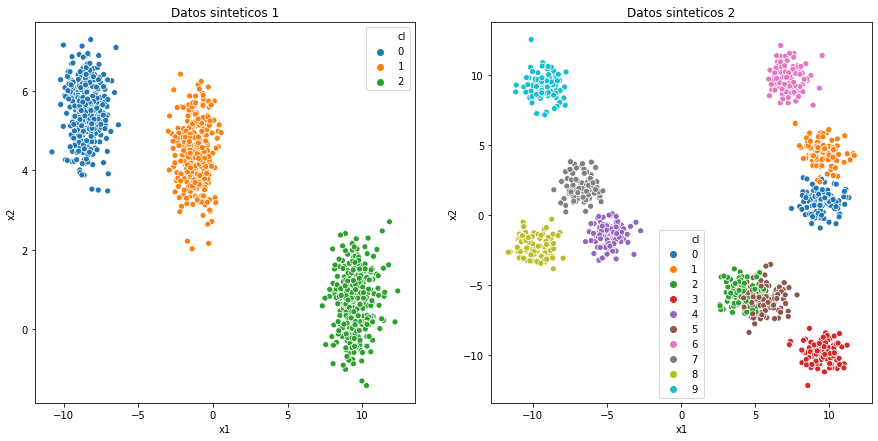

In [61]:
fig = plt.figure(figsize=(15,7))
fig.add_subplot(121)
plt.title('Datos sinteticos 1')
sns.scatterplot(x='x1', y='x2', data = data_toy1, hue='cl')
fig.add_subplot(122)
plt.title('Datos sinteticos 2')
sns.scatterplot(x='x1', y='x2', hue = 'cl', data = data_toy2)

### Train, loss, predict:

Modelos MLP (modelo1, modelo2)

epocas: 15 y 500 respectivamente

optimizador: gradient descent con learning rate de 0.3

función de costo: categorical_crossentropy

metrica: accuracy

outputlayer: función de activación: softmax con 3 y 10 neuronas respectivamente

hiddenlayers:  1 con 50 neuronas, función de activación: sigmoide

In [62]:
model1=NN1HD(neurons_Hidden_layer=50) # modelo con 10 neuronas en la capa oculta
model2=NN1HD(neurons_Hidden_layer=50) # modelo con 10 neuronas en la capa oculta

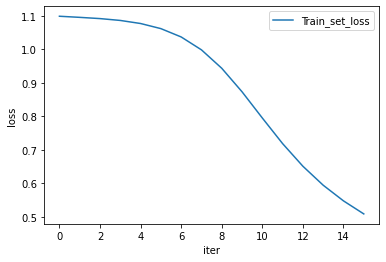

In [81]:
model1.train(X1, y1,learn_rate=0.3, MaxIter=15).plot_loss() #ajuste del modelo1 y loss

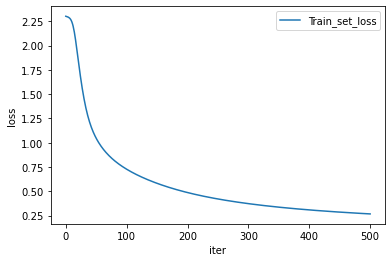

In [64]:
model2.train(X2, y2,learn_rate=0.3, MaxIter=500).plot_loss() #ajuste del modelo2 y loss

In [84]:
y_pred1=model1.predict(X1) #predicciones del modelo1
y_pred2=model2.predict(X2) #predicciones del modelo1

from sklearn.metrics import accuracy_score


print("Train accuracy_score modelo 1: ",accuracy_score(y1, y_pred1))
print()
print("Train accuracy_score modelo 2: ",accuracy_score(y2, y_pred2))

Train accuracy_score modelo 1:  0.992

Train accuracy_score modelo 2:  0.951


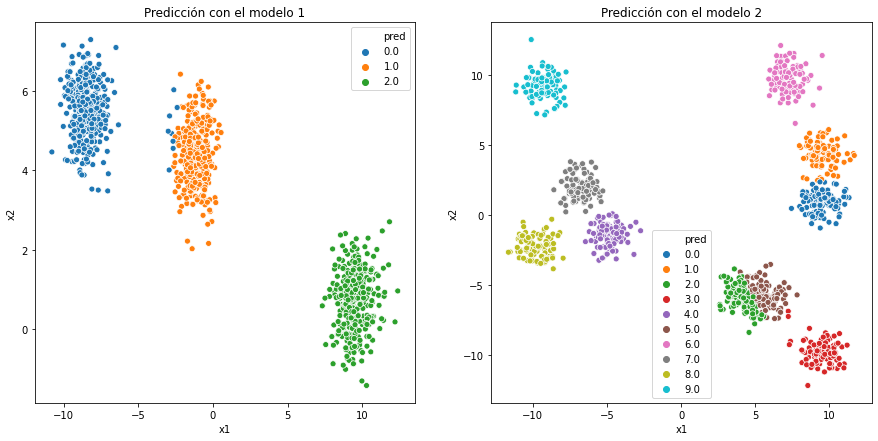

In [85]:
data_toy1 = pd.DataFrame(data_toy1).assign(pred = y_pred1)
data_toy1.pred=data_toy1.pred.astype('category')

data_toy2 = pd.DataFrame(data_toy2).assign(pred = y_pred2)
data_toy2.pred=data_toy2.pred.astype('category')

fig = plt.figure(figsize=(15,7))
fig.add_subplot(121)
plt.title('Predicción con el modelo 1')
sns.scatterplot(x='x1', y='x2', data = data_toy1, hue='pred')
fig.add_subplot(122)
plt.title('Predicción con el modelo 2')
sns.scatterplot(x='x1', y='x2', hue = 'pred', data = data_toy2)

4. Considera los datos de dígitos MNIST. 

(a) Usando la API de keras para tensorflow (`tf.keras`), implementa un baseline basado en regresión logística (multiclase) para la clasificación de dígitos. Reporta su desempeño con las métricas que creas conveniente. Muestra el grafo computacional correspondiente, así como sus métricas, usando tensorboard. 

### <font color=green>Tu respuesta aquí</font>


In [4]:
#librerias necesarias
import os
import datetime


# El conjunto de datos
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Flatten images to 1-D vector of 784 features (28*28).
num_features = 28*28
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

# MNIST dataset parameters.
num_classes = 10 # 0 to 9 digits

In [5]:
#build sequential model. reg log
def reglog_model(input_features=num_features,neurons=num_classes,summary=True):
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(neurons,activation='softmax',input_shape=(input_features,))) #first layer/output layer
    
    if summary==True:
        print(model.summary())
    return model

#compile and train model
def train_model(X_train=x_train,y_train=y_train,X_test=x_test,y_test=y_test,epoch=5,split=0.2,opt='adam',lossf='sparse_categorical_crossentropy',metric='accuracy',direc='logs'):
    model=reglog_model() #obtiene el modelo
    model.compile(optimizer=opt, loss=lossf, metrics=[metric]) #compìla el modelo
    
    #datos para tensorboard
    logdir = os.path.join(direc, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
    
    model.fit(x=X_train,y=y_train, epochs=epoch, validation_data=(X_test, y_test),callbacks=[tensorboard_callback]) #train model #validation_split=split
    
    return model.evaluate(X_test,y_test) #regresa la evaluacion del modelo con el conjunto de prueba

## Baseline (Regresión logística multiclase): 

epocas: 15

optimizador: adam

función de costo: sparse_categorical_crossentropy

metrica: accuracy

outputlayer: función de activación: softmax con 10 neuronas

In [6]:
testloss,testmetric=train_model(epoch=15)
print('test data accuracy (reg_log):',testmetric)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4698 - accuracy: 0.8766 - val_loss: 0.3070 - val_accuracy: 0.9148
Epoch 2/15
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3038 - accuracy: 0.9152 - val_loss: 0.2858 - val_accuracy: 0.9191
Epoch 3/15
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2836 - accuracy: 0.9206 - val_loss: 0.2738 - val_accuracy: 0.9252
Epoch 4/15
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2735 - accuracy: 0.9236 - val_loss: 0.2693 - val_accuracy: 0.92

In [5]:
%load_ext tensorboard

In [6]:
#%tensorboard --logdir logs #problema, no se ejecuta esta linea

# Starts a TensorBoard server on the logs directory, on port 6006
# and opens a new tab in your browser to use it.
def tb(logdir="logs", port=6006, open_tab=True, sleep=2):
    import subprocess
    proc = subprocess.Popen(
        "tensorboard --logdir={0} --port={1}".format(logdir, port), shell=True)
    if open_tab:
        import time
        time.sleep(sleep)
        import webbrowser
        webbrowser.open("http://127.0.0.1:{}/".format(port))
    return proc

In [7]:
server1 = tb() #abre tensorboard en una nueva pagina, si hay problemas volver a cargar la pagina

In [10]:
server1.kill()  # stops the first server

(b) Nuevamente, usando la API de keras, implementa redes neuronales con 1, 2 y 3 unidades ocultas. ¿Qué mejoras obtienes en cada caso respecto al baseline? Reporta todos tus hallazgos. Usa tensorboard para mostrar el modelo y las gráficas que consideres informativas. ¿Qué modelo escogerías en éste caso y porqué?

En ambos incisos, reporta los parámetros que uses, incluyendo el número de unidades ocultas en la capa, el optimizador (uno solo para todos los modelos), el número de datos de entrenamiento, validación, batch, etcétera. SOLO UTILIZA lo que hemos visto hasta ahora.

### <font color=green>Tu respuesta aquí</font>


In [11]:
#build sequential model. mlp
def mlp_model(input_features=num_features,neur_Hid_layer=[10],activ_Hidden='relu',activ_output='softmax',neurons_output=num_classes,summary=True):
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(neur_Hid_layer[0],activation=activ_Hidden,input_shape=(input_features,))) #first layer
    
    layers=len(neur_Hid_layer)
    
    if layers>1: #next hidden layers
        for layer in range(1,layers):
            model.add(tf.keras.layers.Dense(neur_Hid_layer[layer],activation=activ_Hidden))
    
    model.add(tf.keras.layers.Dense(neurons_output,activation=activ_output)) #output layer
    if summary==True:
        print(model.summary())
    return model

#compile and train model
def train_modelmlp(X_train=x_train,y_train=y_train,X_test=x_test,y_test=y_test,neur_Hid_layer=[10],epoch=5,split=0.2,opt='adam',lossf='sparse_categorical_crossentropy',metric='accuracy',direc='logs2'):
    model=mlp_model(neur_Hid_layer=neur_Hid_layer) #obtiene el modelo
    model.compile(optimizer=opt, loss=lossf, metrics=[metric]) #compìla el modelo
    
    #datos para tensorboard
    logdir = os.path.join(direc, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
    
    model.fit(x=X_train,y=y_train, epochs=epoch, validation_data=(X_test, y_test),callbacks=[tensorboard_callback]) #train model
    
    return model.evaluate(X_test,y_test) #regresa la evaluacion del modelo con el conjunto de prueba

## MLP1 (Redes neuronales): 

epocas: 15

optimizador: adam

función de costo: sparse_categorical_crossentropy

metrica: accuracy

outputlayer: función de activación: softmax con 10 neuronas

hiddenlayers:  1 con 25 neuronas, función de activación: relu

In [12]:
testloss,testmetric=train_modelmlp(neur_Hid_layer=[25],epoch=15)
print('test data accuracy (mlp 1 hidden layer, 25 neurons):',testmetric)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                19625     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                260       
Total params: 19,885
Trainable params: 19,885
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3770 - accuracy: 0.8944 - val_loss: 0.2304 - val_accuracy: 0.9312
Epoch 2/15
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2081 - accuracy: 0.9389 - val_loss: 0.1851 - val_accuracy: 0.9433
Epoch 3/15
60000/60000 [==============================] - 4s 58us/sample - loss: 0.1708 - accuracy: 0.9494 - val_loss: 0.1603 - val_accuracy: 0.9517
Epoch 4/15

## MLP2 (Redes neuronales): 

epocas: 15

optimizador: adam

función de costo: sparse_categorical_crossentropy

metrica: accuracy

outputlayer: función de activación: softmax con 10 neuronas

hiddenlayers:  2 con 25 neuronas, función de activación: relu

In [13]:
testloss,testmetric=train_modelmlp(neur_Hid_layer=[25,25],epoch=15)
print('test data accuracy (mlp 2 hidden layer, 25 neurons per layer):',testmetric)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 25)                19625     
_________________________________________________________________
dense_4 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                260       
Total params: 20,535
Trainable params: 20,535
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3780 - accuracy: 0.8905 - val_loss: 0.2114 - val_accuracy: 0.9359
Epoch 2/15
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1877 - accuracy: 0.9460 - val_loss: 0.1749 - val_accuracy: 0.9481
Epoch 3/15
60000/60000 [===

## MLP3 (Redes neuronales): 

epocas: 15

optimizador: adam

función de costo: sparse_categorical_crossentropy

metrica: accuracy

outputlayer: función de activación: softmax con 10 neuronas

hiddenlayers:  3 con 25 neuronas, función de activación: relu

In [14]:
testloss,testmetric=train_modelmlp(neur_Hid_layer=[25,25,25],epoch=15)
print('test data accuracy (mlp 3 hidden layer, 25 neurons per layer):',testmetric)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 25)                19625     
_________________________________________________________________
dense_7 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_8 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                260       
Total params: 21,185
Trainable params: 21,185
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3920 - accuracy: 0.8842 - val_loss: 0.2037 - val_accuracy: 0.9419
Epoch 2/15
60000/60000 [====================

In [15]:
server2 = tb("logs2", 6007) # Starts a second server on the logs2 directory, on port 6007, # and opens a new tab to use it.        

In [16]:
server2.kill()  # stops the second server

## Resultados:

El base line (Regresión logística multiclase) apartir de 7 epocas no hay una mejora significativa en el accuracy de 0.92/0.92 (train/validation), mientras que los modelos con redes neuronales desde las primera  epoca alcanzan ese mismo o mayor nivel y siguen creciendo, un poco mas rápido con 2 capas, con 3 no hay mucha diferencia. Para la validación se nota que se estabiliza alrededor de la época 8  pero ya no hay una mejora significativa y entrenarlos más sólo causaría sobre ajuste. 

Por lo tanto, el mejor modelo, en este caso es el de redes neuronales con dos capas ocultas con 25 neuronas cada una, es menos complejo que el de 3 capas, y necesita de 8 epocas aproximadamente para converger a un accuracy de 0.97/0.96 (train/validation), suficiente para no causar sobre ajuste.